In [1]:
import numpy as n
import pandas as pd
import PIL 
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
warnings.simplefilter('ignore')
import os 
import pathlib 

In [2]:
import ultralytics
from ultralytics import YOLO
yolo_model = YOLO('yolov8m.pt')

In [3]:
img1=yolo_model.predict(source=r"download.jpg",save=True, conf=0.2,iou=0.5)
img2=yolo_model.predict(source=r"1479505759946369649.jpg",save=True, conf=0.2,iou=0.5)


image 1/1 C:\Users\arwa1\Downloads\download.jpg: 416x640 10 cars, 3 traffic lights, 1 fire hydrant, 1215.8ms
Speed: 14.5ms preprocess, 1215.8ms inference, 8.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict14

image 1/1 C:\Users\arwa1\Downloads\1479505759946369649.jpg: 416x640 2 cars, 1 stop sign, 1165.7ms
Speed: 3.9ms preprocess, 1165.7ms inference, 8.9ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict14


**Image 1**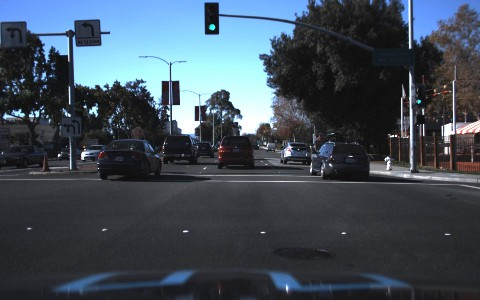

**Image 2**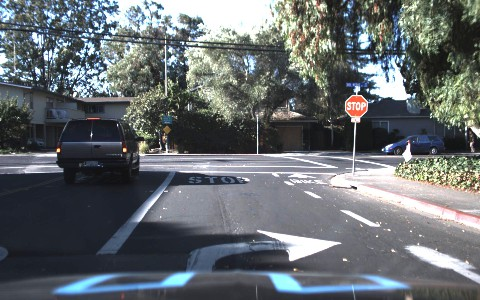

In [4]:
img1=img1[0]

In [5]:
# finding the detailed result(Class, Coordinates, Prob)
for box in img1.boxes:
    class_id = img1.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [96, 139, 162, 180]
Probability: 0.91
---
Object type: traffic light
Coordinates: [204, 3, 219, 35]
Probability: 0.84
---
Object type: car
Coordinates: [217, 136, 254, 169]
Probability: 0.83
---
Object type: car
Coordinates: [280, 143, 312, 165]
Probability: 0.81
---
Object type: car
Coordinates: [311, 142, 370, 181]
Probability: 0.8
---
Object type: car
Coordinates: [81, 145, 106, 161]
Probability: 0.76
---
Object type: car
Coordinates: [0, 145, 46, 168]
Probability: 0.72
---
Object type: car
Coordinates: [197, 142, 214, 158]
Probability: 0.71
---
Object type: car
Coordinates: [162, 135, 199, 165]
Probability: 0.57
---
Object type: traffic light
Coordinates: [416, 84, 427, 108]
Probability: 0.51
---
Object type: fire hydrant
Coordinates: [384, 156, 393, 171]
Probability: 0.5
---
Object type: car
Coordinates: [266, 143, 276, 152]
Probability: 0.5
---
Object type: traffic light
Coordinates: [194, 106, 200, 121]
Probability: 0.33
---
Object type: car
Coordin

In [6]:
img2=img2[0]

In [7]:
# finding the detailed result(Class, Coordinates, Prob)
for box in img2.boxes:
    class_id = img2.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: stop sign
Coordinates: [345, 95, 368, 118]
Probability: 0.88
---
Object type: car
Coordinates: [382, 135, 446, 156]
Probability: 0.86
---
Object type: car
Coordinates: [55, 118, 144, 185]
Probability: 0.82
---


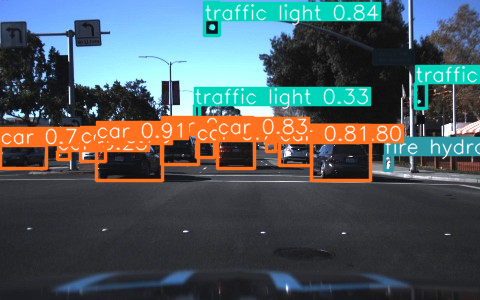

In [10]:
# Plotting results
res_plotted = img1.plot()
res_plotted = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)   #opencv uses BGR color format, while other image libraries (e.g. Image) uses RGB. So we need a conversion from BGR to RGB
display(Image.fromarray(res_plotted)) # .fromarray is used to create image from numpy array

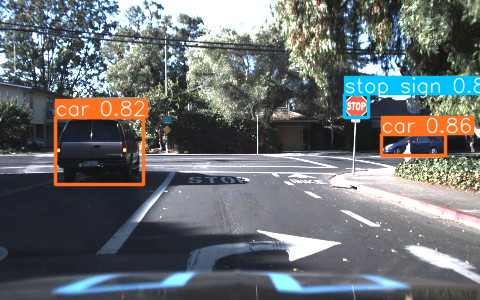

In [11]:
# Plotting results
res_plotted = img2.plot()
res_plotted = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)   #opencv uses BGR color format, while other image libraries (e.g. Image) uses RGB. So we need a conversion from BGR to RGB
display(Image.fromarray(res_plotted)) # .fromarray is used to create image from numpy array